In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

Dataset has 2380 rows and 7 columns. Keys for columns:

"year" - year (1990-2017)
"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
"npg" - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate
"birth_rate" - number of births by 1000 people
"death_rate" - number of deaths by 1000 people
"gdw" - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years
"urbanization" - % of urban population

In [6]:
df1 = pd.read_csv('Data/russian_demography.csv')
df2 = pd.read_csv('Data/russia_alcohol.csv')

data = df1.merge(df2)
data

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,-4.3,9.6,13.9,83.33,53.05,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,-4.0,8.8,12.8,72.67,52.76,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,-1.8,10.4,12.2,65.59,66.07,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,-4.2,9.1,13.3,68.28,74.30,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,-3.7,9.6,13.3,73.76,68.13,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,0.0,13.2,13.2,74.05,61.30,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.6,13.6,10.0,56.18,69.20,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,7.6,16.0,8.4,67.83,65.40,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,10.1,15.4,5.3,51.10,83.70,4.5,75.8,8.2,1.7,1.3


In [7]:
(data.isna().sum()/data.__len__())*100


year            0.000000
region          0.000000
npg             2.291022
birth_rate      2.291022
death_rate      2.414861
gdw             2.105263
urbanization    2.105263
wine            3.900929
beer            3.591331
vodka           3.777090
champagne       3.900929
brandy          4.086687
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1615 non-null   int64  
 1   region        1615 non-null   object 
 2   npg           1578 non-null   float64
 3   birth_rate    1578 non-null   float64
 4   death_rate    1576 non-null   float64
 5   gdw           1581 non-null   float64
 6   urbanization  1581 non-null   float64
 7   wine          1552 non-null   float64
 8   beer          1557 non-null   float64
 9   vodka         1554 non-null   float64
 10  champagne     1552 non-null   float64
 11  brandy        1549 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 164.0+ KB


In [23]:
data["total_alcohol"] = data["wine"] + data["beer"] + data["vodka"] + data["champagne"] + data["brandy"]
data

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_alcohol
0,1998,Republic of Adygea,-4.3,9.6,13.9,83.33,53.05,1.9,8.8,3.4,0.3,0.1,14.5
1,1998,Altai Krai,-4.0,8.8,12.8,72.67,52.76,3.3,19.2,11.3,1.1,0.1,35.0
2,1998,Amur Oblast,-1.8,10.4,12.2,65.59,66.07,2.1,21.2,17.3,0.7,0.4,41.7
3,1998,Arkhangelsk Oblast,-4.2,9.1,13.3,68.28,74.30,4.3,10.6,11.7,0.4,0.3,27.3
4,1998,Astrakhan Oblast,-3.7,9.6,13.3,73.76,68.13,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,0.0,13.2,13.2,74.05,61.30,5.0,42.3,7.7,0.7,0.4,56.1
1611,2016,Chukotka Autonomous Okrug,3.6,13.6,10.0,56.18,69.20,3.9,34.0,11.6,1.8,1.1,52.4
1612,2016,Sakha (Yakutia) Republic,7.6,16.0,8.4,67.83,65.40,4.3,56.1,8.2,1.8,0.5,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,10.1,15.4,5.3,51.10,83.70,4.5,75.8,8.2,1.7,1.3,91.5


In [28]:
data_lr = data.drop(columns=['year','region'])
data_lr

,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_alcohol
0,-4.3,9.6,13.9,83.33,53.05,1.9,8.8,3.4,0.3,0.1,14.5
1,-4.0,8.8,12.8,72.67,52.76,3.3,19.2,11.3,1.1,0.1,35.0
2,-1.8,10.4,12.2,65.59,66.07,2.1,21.2,17.3,0.7,0.4,41.7
3,-4.2,9.1,13.3,68.28,74.30,4.3,10.6,11.7,0.4,0.3,27.3
4,-3.7,9.6,13.3,73.76,68.13,2.9,18.0,9.5,0.8,0.2,31.4
...,...,...,...,...,...,...,...,...,...,...,...
1610,0.0,13.2,13.2,74.05,61.30,5.0,42.3,7.7,0.7,0.4,56.1
1611,3.6,13.6,10.0,56.18,69.20,3.9,34.0,11.6,1.8,1.1,52.4
1612,7.6,16.0,8.4,67.83,65.40,4.3,56.1,8.2,1.8,0.5,70.9
1613,10.1,15.4,5.3,51.10,83.70,4.5,75.8,8.2,1.7,1.3,91.5


In [ ]:
# def plot_alcohol_by_year():
#     plt.figure(figsize=(15,7))
#     plt.plot(data_mean_year['year'], data_mean_year['total_alcohol'])
#     plt.show()
    
# fig, axs = plt.subplots(1, 3, figsize=(15, 7))
# axs[0].plot(data_mean_year['year'], data_mean_year['birth_rate'])
# axs[1].plot(data_mean_year['year'], data_mean_year['death_rate'])
# axs[2].plot(data_mean_year['year'], data_mean_year['total_alcohol'])
# fig.suptitle('Birth rate and alcoholism')

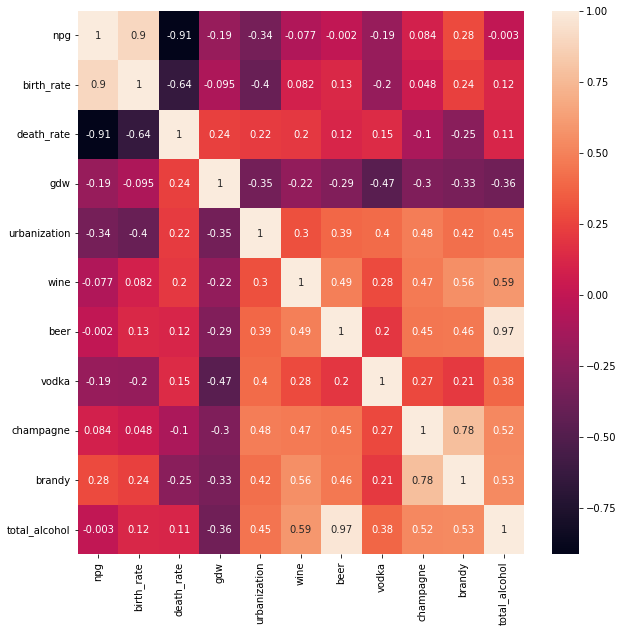

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data_lr.corr(),annot=True)
plt.show()

### Linear regression

In [19]:
y = data['brandy']

X = data.drop(columns=['brandy','year','region'])

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
y_test

285     0.6
475     0.4
1414    1.3
548     0.1
1351    0.5
       ... 
952     NaN
949     0.4
1327    0.6
709     0.5
776     0.4
Name: brandy, Length: 485, dtype: float64